In [36]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy import stats
from matplotlib import style

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the dataset
train = pd.read_csv('Train Dataset.csv')
test = pd.read_csv('Test Dataset.csv')
sub = pd.read_csv('Sample Submission.csv')
var = pd.read_csv('Variable_Definitions.csv')

In [38]:
# Change column names to lowercase in the training dataset
train.columns = train.columns.str.lower()

In [39]:
# View the first five rows of the train dataset
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [40]:
# Check the structure of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [41]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
train.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

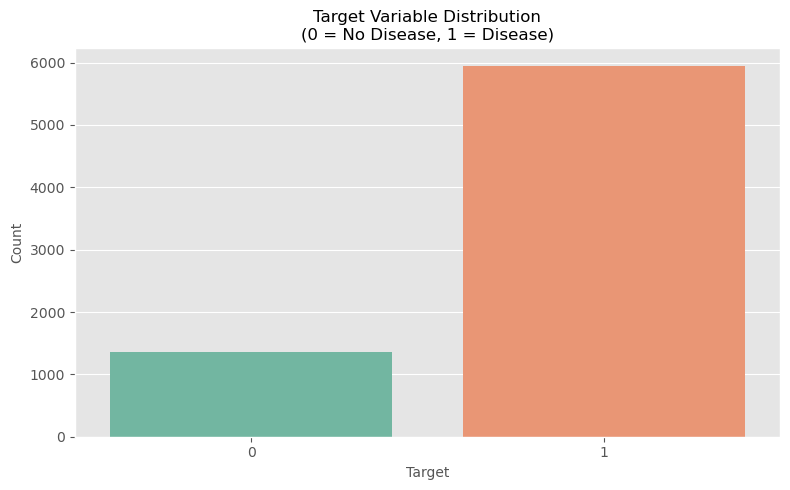

In [43]:
# Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=train, palette='Set2')
plt.title('Target Variable Distribution\n(0 = No Disease, 1 = Disease)', fontsize=12)
plt.xlabel('Target', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

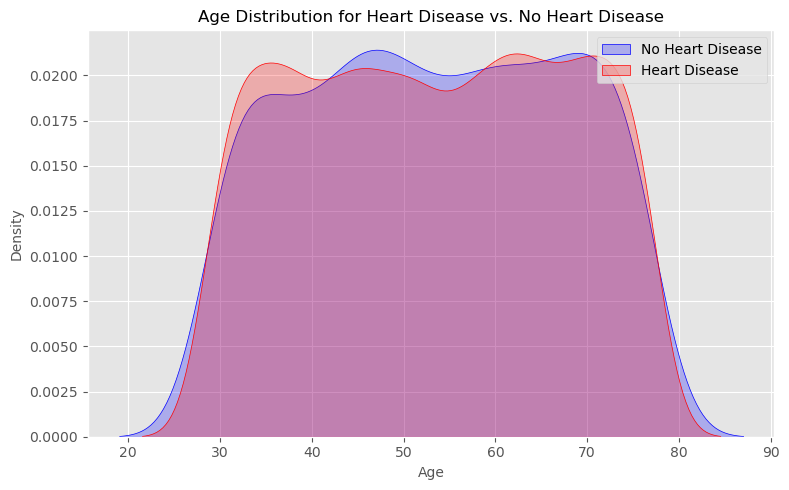

In [44]:
# Age Distribution by Target
plt.figure(figsize=(8, 5))
sns.kdeplot(train[train['target'] == 0]['age'], label='No Heart Disease', shade=True, color='blue')
sns.kdeplot(train[train['target'] == 1]['age'], label='Heart Disease', shade=True, color='red')
plt.title('Age Distribution for Heart Disease vs. No Heart Disease', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

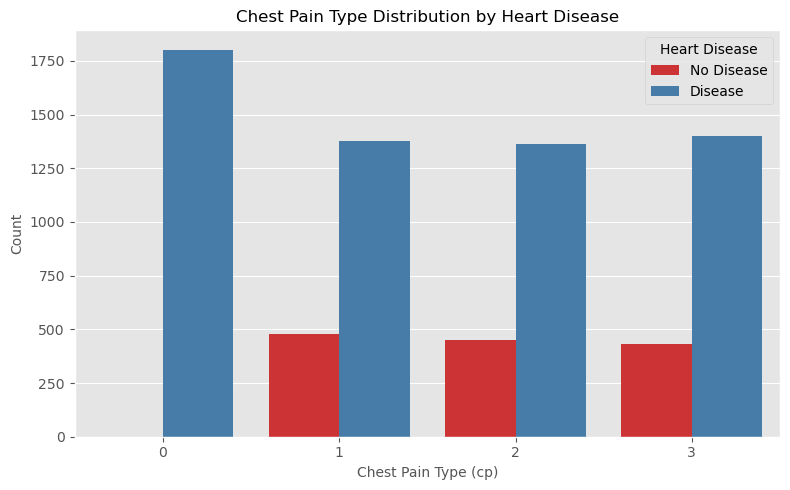

In [45]:
# Chest Pain Type vs Target
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=train, palette='Set1')
plt.title('Chest Pain Type Distribution by Heart Disease', fontsize=12)
plt.xlabel('Chest Pain Type (cp)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Heart Disease', loc='upper right', labels=['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

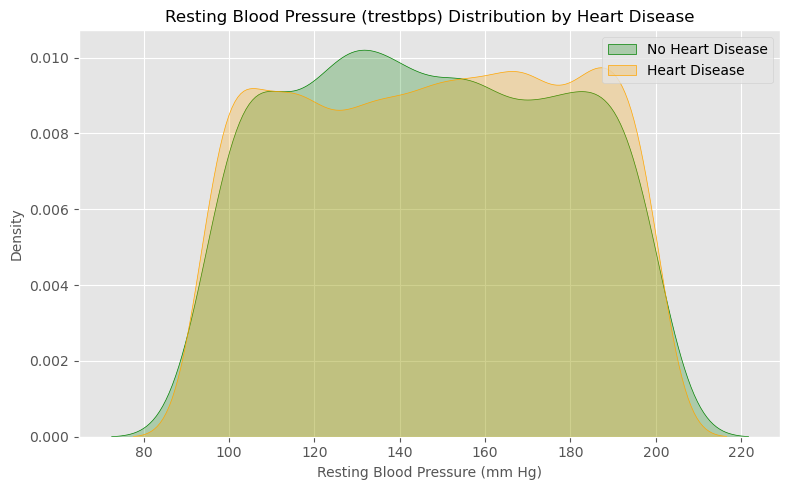

In [46]:
# Resting Blood Pressure Distribution by Target
plt.figure(figsize=(8, 5))
sns.kdeplot(train[train['target'] == 0]['trestbps'], label='No Heart Disease', shade=True, color='green')
sns.kdeplot(train[train['target'] == 1]['trestbps'], label='Heart Disease', shade=True, color='orange')
plt.title('Resting Blood Pressure (trestbps) Distribution by Heart Disease', fontsize=12)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

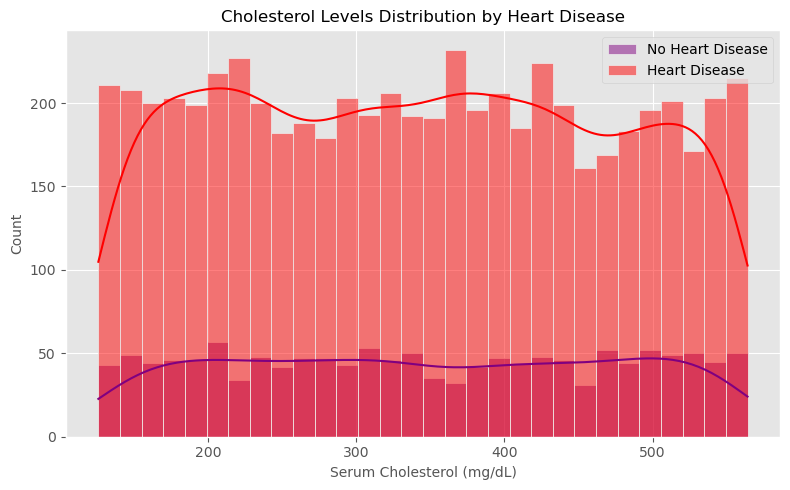

In [47]:
# Cholesterol Levels Distribution by Target
plt.figure(figsize=(8, 5))
sns.histplot(train[train['target'] == 0]['chol'], label='No Heart Disease', kde=True, color='purple', bins=30)
sns.histplot(train[train['target'] == 1]['chol'], label='Heart Disease', kde=True, color='red', bins=30)
plt.title('Cholesterol Levels Distribution by Heart Disease', fontsize=12)
plt.xlabel('Serum Cholesterol (mg/dL)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

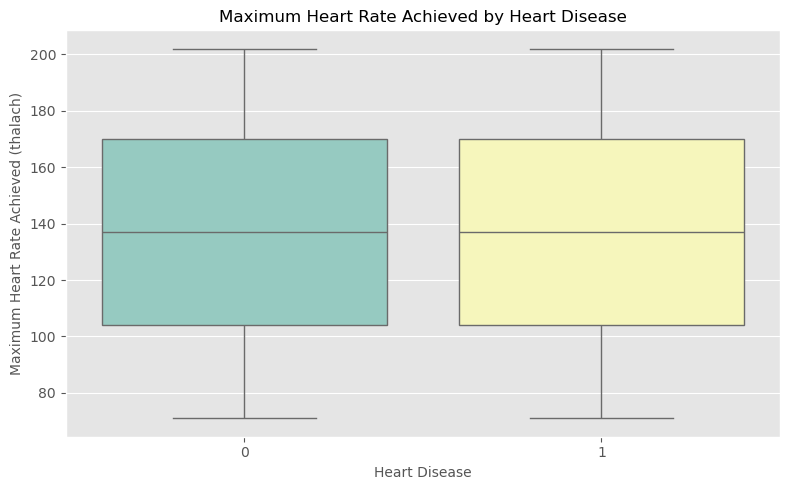

In [48]:
# 6. Maximum Heart Rate Achieved vs Target
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='thalach', data=train, palette='Set3')
plt.title('Maximum Heart Rate Achieved by Heart Disease', fontsize=12)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Maximum Heart Rate Achieved (thalach)', fontsize=10)
plt.tight_layout()
plt.show()

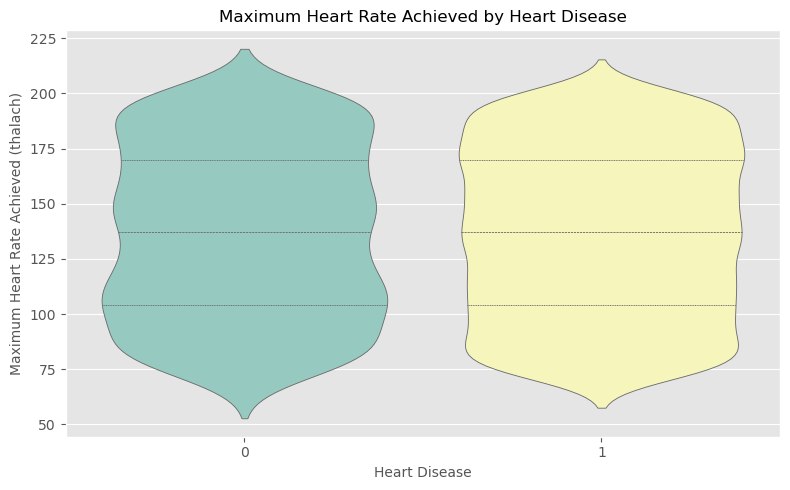

In [60]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='thalach', data=train, palette='Set3', inner='quartile')
plt.title('Maximum Heart Rate Achieved by Heart Disease', fontsize=12)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Maximum Heart Rate Achieved (thalach)', fontsize=10)
plt.tight_layout()
plt.show()

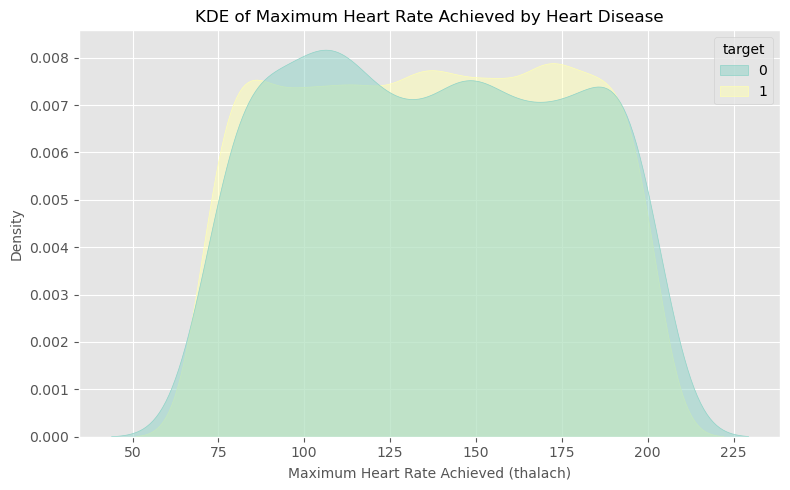

In [61]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=train, x='thalach', hue='target', fill=True, palette='Set3', common_norm=False, alpha=0.5)
plt.title('KDE of Maximum Heart Rate Achieved by Heart Disease', fontsize=12)
plt.xlabel('Maximum Heart Rate Achieved (thalach)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.tight_layout()
plt.show()

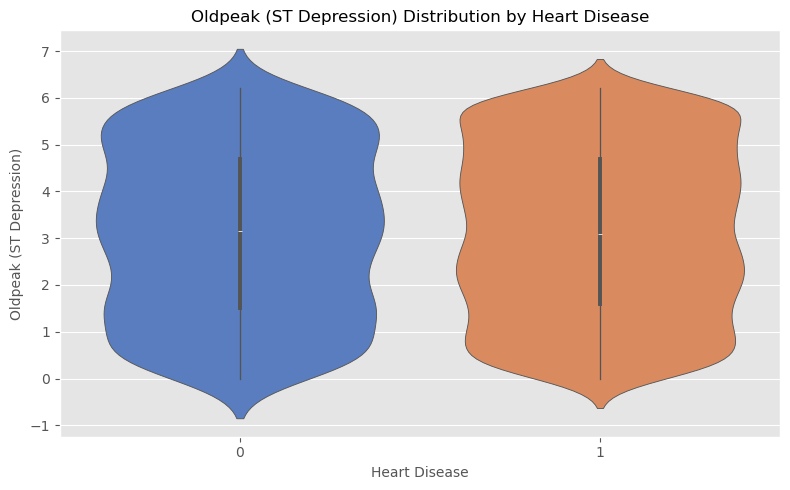

In [49]:
# Oldpeak (ST Depression) Distribution by Target
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='oldpeak', data=train, palette='muted')
plt.title('Oldpeak (ST Depression) Distribution by Heart Disease', fontsize=12)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Oldpeak (ST Depression)', fontsize=10)
plt.tight_layout()
plt.show()

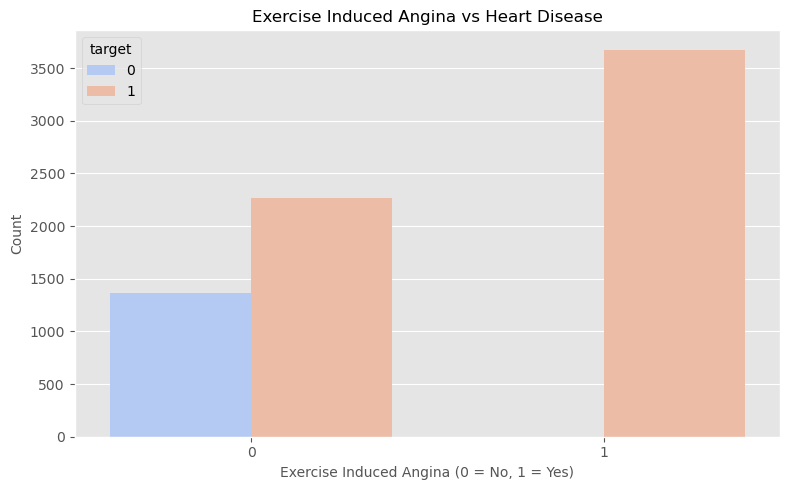

In [50]:
# Exercise Induced Angina vs Target
plt.figure(figsize=(8, 5))
sns.countplot(x='exang', hue='target', data=train, palette='coolwarm')
plt.title('Exercise Induced Angina vs Heart Disease', fontsize=12)
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

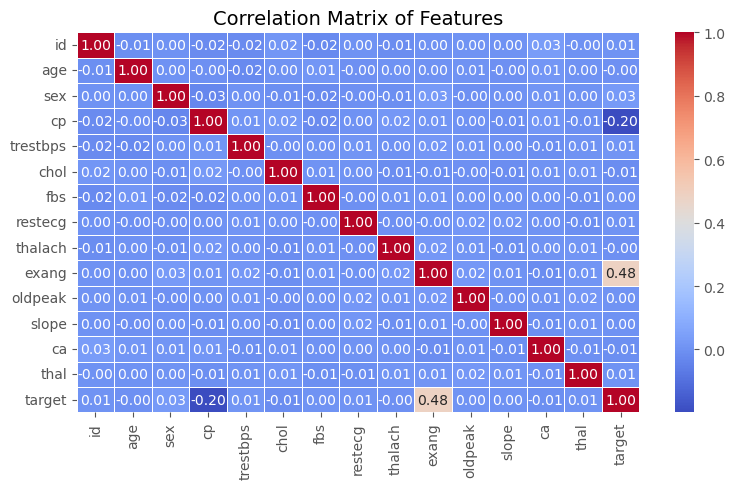

In [51]:
# Correlation Matrix
plt.figure(figsize=(8, 5))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=14)
plt.tight_layout()
plt.show()

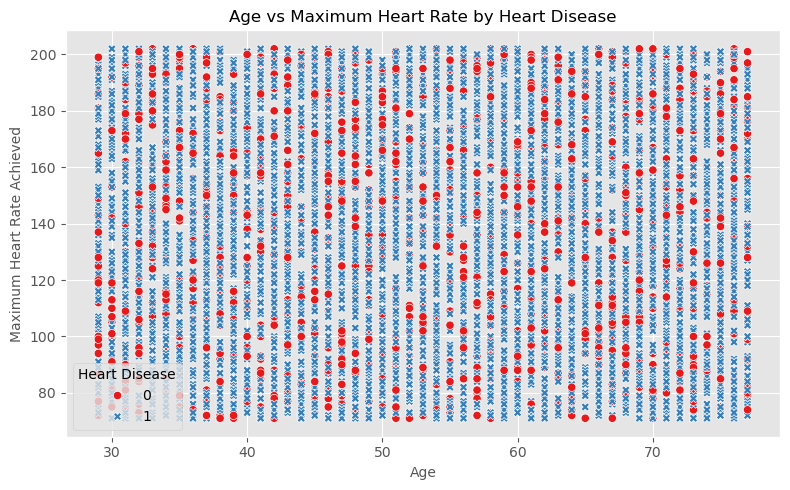

In [52]:
# Age vs Maximum Heart Rate (thalach) by Target
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train, x='age', y='thalach', hue='target', style='target', palette='Set1')
plt.title('Age vs Maximum Heart Rate by Heart Disease', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Maximum Heart Rate Achieved', fontsize=10)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

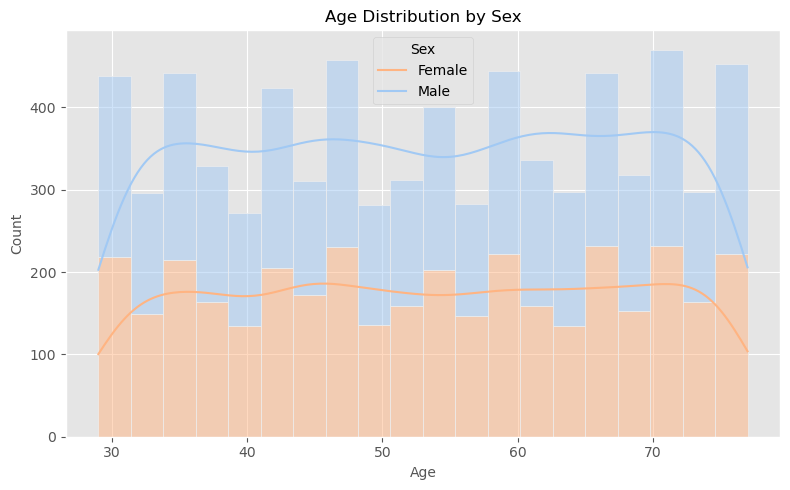

In [53]:
# Age Distribution by Sex
plt.figure(figsize=(8, 5))
sns.histplot(data=train, x='age', hue='sex', multiple='stack', kde=True, palette='pastel', bins=20)
plt.title('Age Distribution by Sex', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

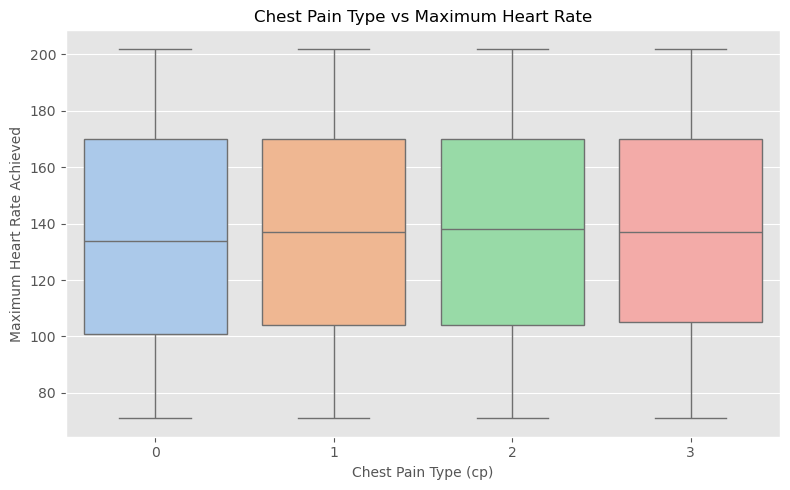

In [54]:
# Chest Pain Type vs Maximum Heart Rate
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, x='cp', y='thalach', palette='pastel')
plt.title('Chest Pain Type vs Maximum Heart Rate', fontsize=12)
plt.xlabel('Chest Pain Type (cp)', fontsize=10)
plt.ylabel('Maximum Heart Rate Achieved', fontsize=10)
plt.tight_layout()
plt.show()

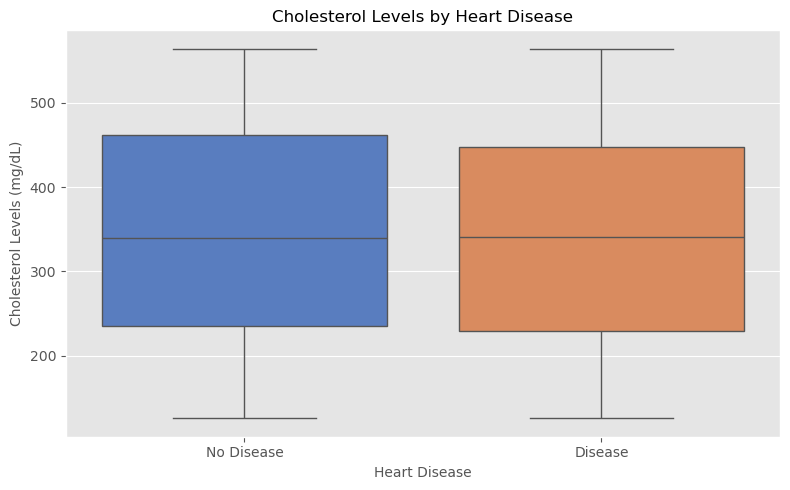

In [55]:
# Cholesterol Levels Boxplot by Target
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='chol', data=train, palette='muted')
plt.title('Cholesterol Levels by Heart Disease', fontsize=12)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Cholesterol Levels (mg/dL)', fontsize=10)
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

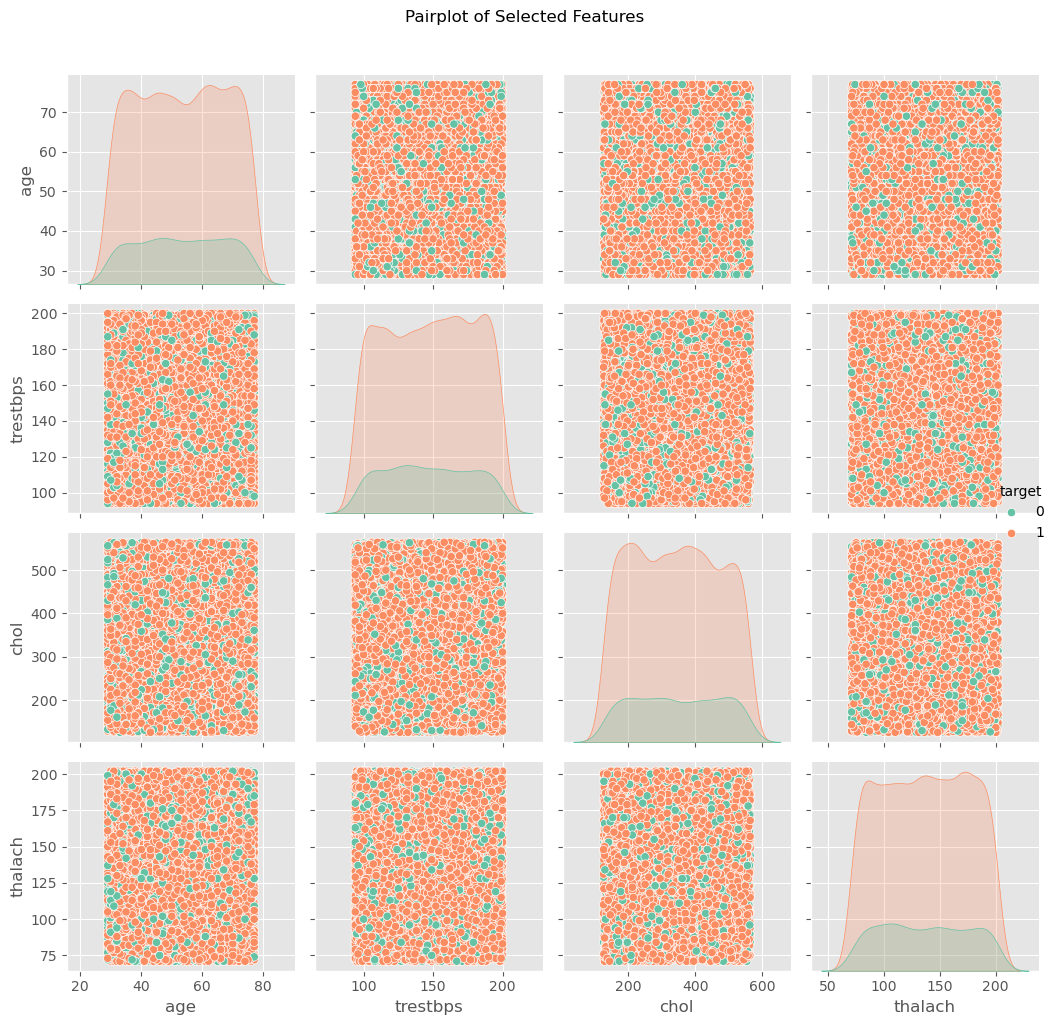

In [56]:
# Pairplot for Select Features
plt.figure(figsize=(8, 5))
sns.pairplot(train, hue='target', vars=['age', 'trestbps', 'chol', 'thalach'], palette='Set2')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

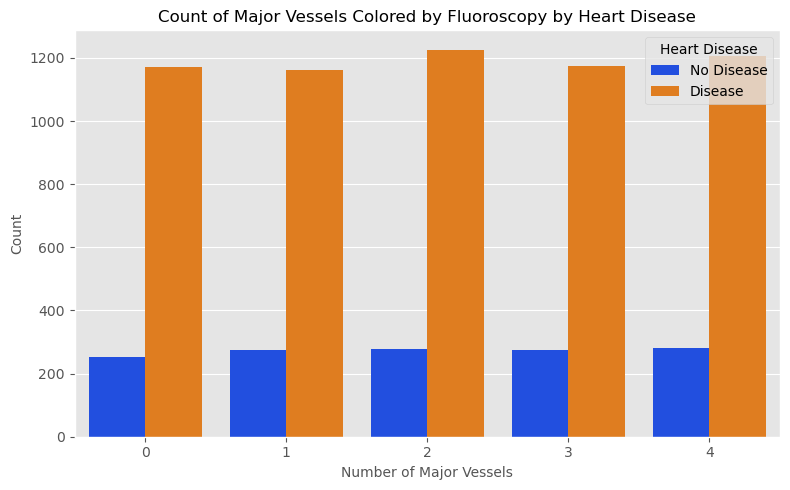

In [57]:
# Count of Major Vessels Colored by Fluoroscopy
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='ca', hue='target', palette='bright')
plt.title('Count of Major Vessels Colored by Fluoroscopy by Heart Disease', fontsize=12)
plt.xlabel('Number of Major Vessels', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

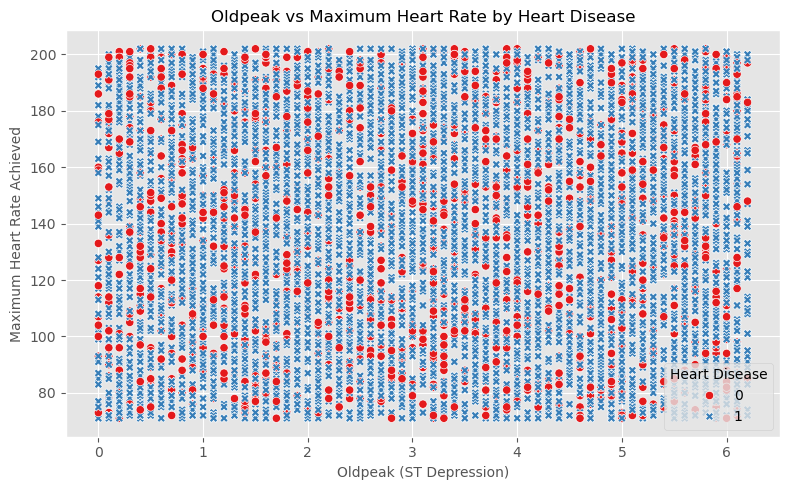

In [58]:
# Oldpeak vs Thalach by Target
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train, x='oldpeak', y='thalach', hue='target', style='target', palette='Set1')
plt.title('Oldpeak vs Maximum Heart Rate by Heart Disease', fontsize=12)
plt.xlabel('Oldpeak (ST Depression)', fontsize=10)
plt.ylabel('Maximum Heart Rate Achieved', fontsize=10)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

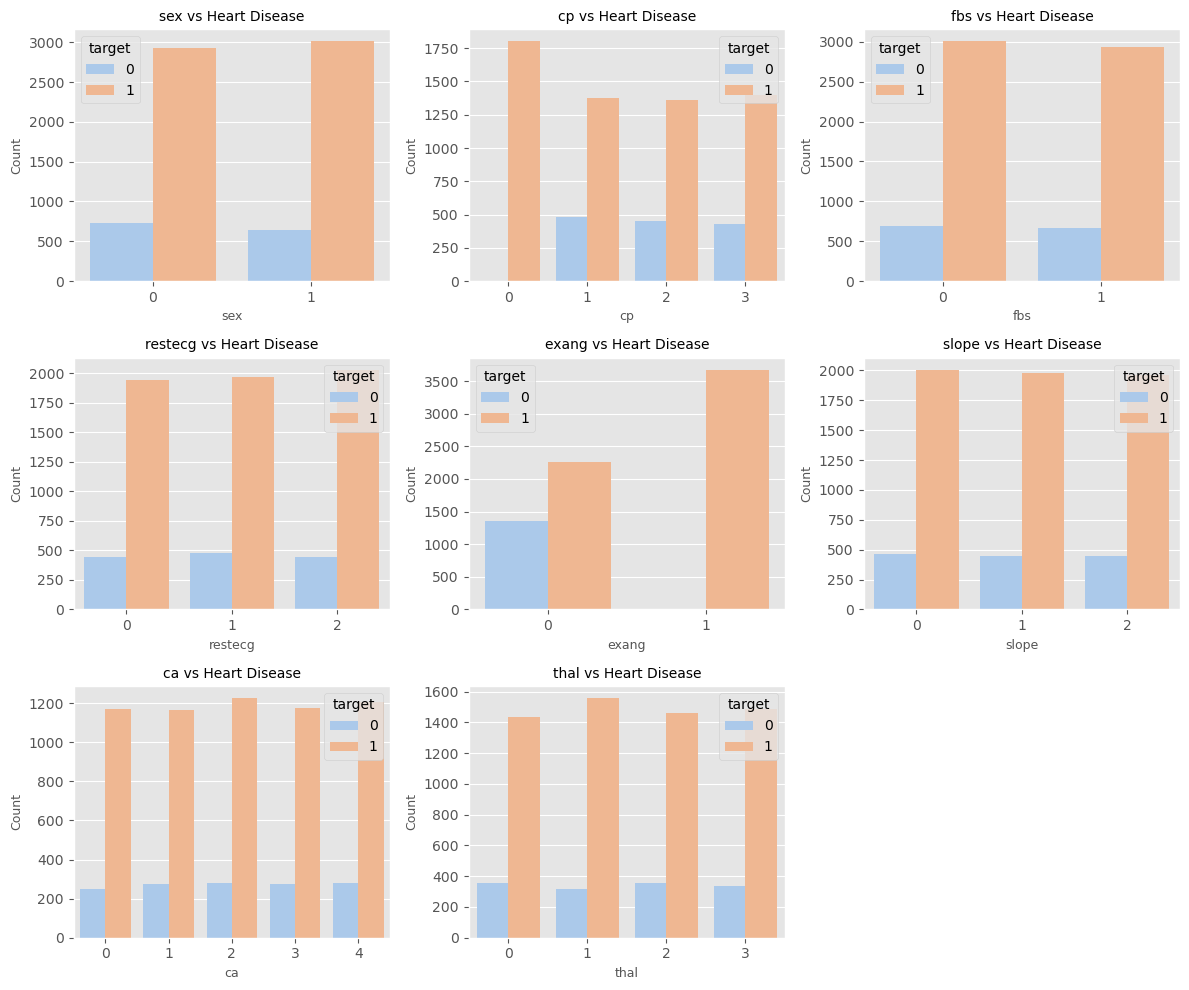

In [59]:
# Categorical Feature Summary
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='target', data=train, palette='pastel')
    plt.title(f'{feature} vs Heart Disease', fontsize=10)
    plt.xlabel(feature, fontsize=9)
    plt.ylabel('Count', fontsize=9)
plt.tight_layout()
plt.show()